In [367]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [368]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.transform import from_origin
import os
import geojson
import pandas as pd
import shutil

# GENERATE RANDOM IMAGE

In [369]:
# Set a specific random seed for reproducibility
np.random.seed(42)

# Image dimensions
width = 4
height = 4
num_bands = 8

# Georeferencing information (coordinates for Verges)
left = 3.0466    # Left coordinate
top = 42.0533   # Top coordinate
pixel_size = 0.0001  # Pixel size

# Output file path
# Get the current directory of the script
current_directory = os.getcwd()
os.mkdir(os.path.join(current_directory, "data"))
# Combine the current directory with the relative path to the "data" directory
data_directory = os.path.join(current_directory, "data")
output_filename = os.path.join(data_directory, "S2L2A_2019-06-02.tif")

# Generate random data for the image
random_data = np.random.randint(0, 255, size=(num_bands, height, width), dtype=np.int16)

transform = from_origin(left, top, pixel_size, pixel_size)

with rasterio.open(output_filename, 'w', driver='GTiff', height=height, width=width, count=num_bands,
                   dtype=random_data.dtype, crs='+proj=latlong', transform=transform) as dst:
    for i in range(num_bands):
        dst.write(random_data[i], i + 1)

# Create a mask of type .geojson to mask simulated image
def aoi_mask():
    return {
        "type": "FeatureCollection",
        "features": [
            {
                "type": "Feature",
                "properties": {},
                "geometry": {
                    "type": "Polygon",
                    "coordinates": [
                        [
                            [3.0439, 42.076056],
                            [3.017464, 42.052607],
                            [3.0439, 42.032209],
                            [3.079262, 42.055156],
                            [3.0439, 42.076056],
                        ]
                    ],
                },
            }
        ],
    }

aoi_mask = aoi_mask()

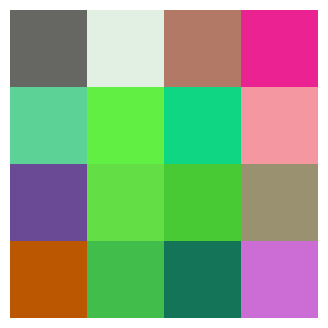

In [370]:
# Display the image
plt.figure(figsize=(4, 4))
plt.imshow(random_data[0:3, :, :].transpose(1, 2, 0))
plt.axis('off')
plt.show()

# READ RANDOM IMAGE (bands=[4,8])

In [371]:
import matplotlib.pyplot as plt
import sys
from spai.storage.Storage import Storage

storage = Storage('data')
image = storage.read("S2L2A_2019-06-02.tif")
date="2019-06-02"

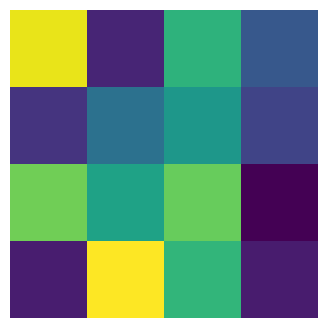

In [372]:
plt.figure(figsize=(4,4))
plt.imshow(image.read(4)) # plot the 4th band
plt.axis('off')
plt.show()

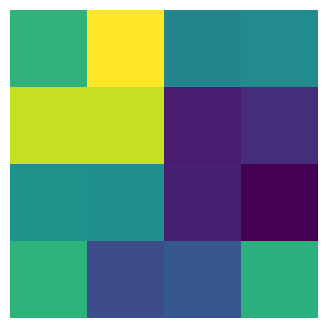

In [373]:
plt.figure(figsize=(4,4))
plt.imshow(image.read(8)) # 8 is the NIR band
plt.axis('off')
plt.show()

In [374]:
image.read(4)

array([[235,  26, 157,  68],
       [ 37,  91, 129,  51],
       [191, 140, 187,   1],
       [ 20, 243, 160,  19]], dtype=int16)

In [375]:
image.read(8)

array([[168, 248, 125, 130],
       [228, 228,  37,  50],
       [136, 134,  40,  20],
       [167,  72,  83, 166]], dtype=int16)

In [376]:
from spai.analytics import forest_monitoring

forest_monitoring("S2L2A_2019-06-02.tif",aoi_mask,storage)

# NDVI

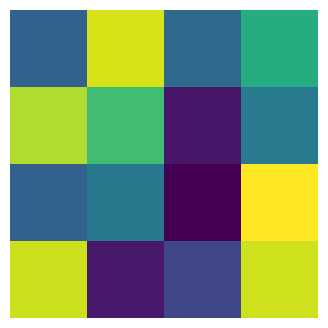

In [377]:
ndvi = storage.read(f'ndvi_{date}.tif')

plt.figure(figsize=(4,4))
plt.imshow(ndvi.read(1))
plt.axis('off')
plt.show()

In [378]:
ndvi.read().shape

(1, 4, 4)

In [379]:
ndvi.read()

array([[[-0.1662531 ,  0.81021898, -0.11347518,  0.31313131],
        [ 0.72075472,  0.42946708, -0.55421687, -0.00990099],
        [-0.16819572, -0.02189781, -0.64757709,  0.9047619 ],
        [ 0.78609626, -0.54285714, -0.31687243,  0.79459459]]])

In [380]:
ndvi.read().max(), ndvi.read().min()

(0.9047619043310657, -0.6475770924824855)

# NDVI MASKED

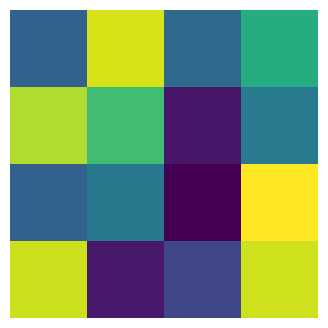

In [381]:
ndvi_masked = storage.read(f'ndvi_masked_{date}.tif')

plt.figure(figsize=(4,4))
plt.imshow(ndvi_masked.read(1))
plt.axis('off')
plt.show()

In [382]:
ndvi_masked.read().shape

(1, 4, 4)

In [383]:
ndvi_masked.read()

array([[[-0.1662531 ,  0.81021898, -0.11347518,  0.31313131],
        [ 0.72075472,  0.42946708, -0.55421687, -0.00990099],
        [-0.16819572, -0.02189781, -0.64757709,  0.9047619 ],
        [ 0.78609626, -0.54285714, -0.31687243,  0.79459459]]])

# NDVI CATEGORIZED

In [384]:
ndvi_categorized = storage.read(f'ndvi_categorized_{date}.tif')
ndvi_categorized.read()

array([[[0, 3, 0, 1],
        [3, 2, 0, 0],
        [0, 0, 0, 3],
        [3, 0, 0, 3]]])

In [385]:
np.unique(ndvi_categorized.read())

array([0, 1, 2, 3])

In [386]:
np.count_nonzero(ndvi_categorized.read() == 0)

9

In [387]:
np.count_nonzero(ndvi_categorized.read() == 1)

1

In [388]:
np.count_nonzero(ndvi_categorized.read() == 2)

1

In [389]:
np.count_nonzero(ndvi_categorized.read() == 3)

5

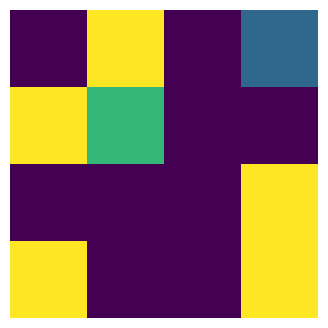

In [390]:
plt.figure(figsize=(4,4))
plt.imshow(ndvi_categorized.read(1))
plt.axis('off')
plt.show()

# VEGETATION

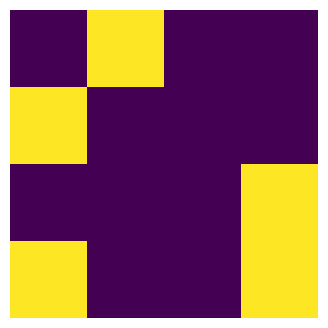

In [391]:
vegetation = storage.read(f'vegetation_{date}.tif')

plt.figure(figsize=(4,4))
plt.imshow(vegetation.read(1))
plt.axis('off')
plt.show()

In [392]:
vegetation.read().shape

(1, 4, 4)

In [393]:
vegetation.read()

array([[[0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 1]]])

In [394]:
np.unique(vegetation.read())

array([0, 1])

In [395]:
np.count_nonzero(vegetation.read() == 0)

11

In [396]:
np.count_nonzero(vegetation.read() == 1)

5

# VEGETATION MASKED

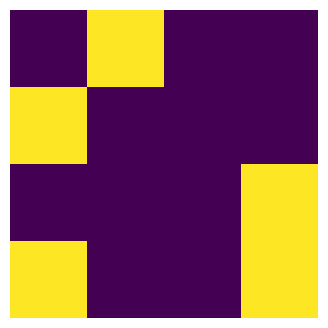

In [397]:
vegetation_masked = storage.read(f'vegetation_masked_{date}.tif')

plt.figure(figsize=(4,4))
plt.imshow(vegetation_masked.read(1))
plt.axis('off')
plt.show()

In [398]:
vegetation_masked.read().shape

(1, 4, 4)

In [399]:
vegetation_masked.read()

array([[[0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 1]]])

In [400]:
np.unique(vegetation_masked.read())

array([0, 1])

In [401]:
np.count_nonzero(vegetation_masked.read()==0)

11

In [402]:
np.count_nonzero(vegetation_masked.read()==1)

5

# VEGETATION MASKED RGB

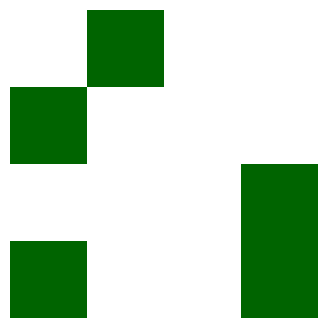

In [403]:
vegetation_masked_rgb = storage.read(f'vegetation_masked_rgb_{date}.tif')

plt.figure(figsize=(4,4))
plt.imshow(vegetation_masked_rgb.read())
plt.axis('off')
plt.show()

In [404]:
vegetation_masked_rgb.read().shape

(4, 4, 4)

In [405]:
vegetation_masked_rgb.read()

array([[[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.39215686, 0.        , 1.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.39215686, 0.        , 1.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.39215686, 0.        , 1.        ]],

       [[0.        , 0.39215686, 0.        , 1.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.39215686, 0.        , 1.        ]]])

In [406]:
np.unique(vegetation_masked_rgb.read())

array([0.        , 0.39215686, 1.        ])

In [407]:
np.unique(vegetation_masked_rgb.read())[1]

0.39215686274509803

In [408]:
np.count_nonzero(vegetation_masked_rgb.read() == 0)

54

In [409]:
np.count_nonzero(vegetation_masked_rgb.read() == 1)

5

# QUALITY MASKED

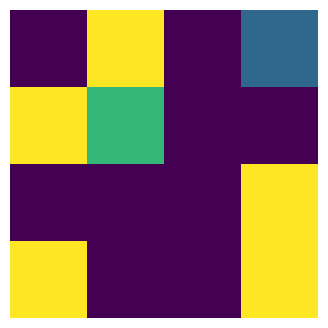

In [410]:
quality_masked = storage.read(f'quality_masked_{date}.tif')

plt.figure(figsize=(4,4))
plt.imshow(quality_masked.read(1))
plt.axis('off')
plt.show()

In [411]:
quality_masked.read().shape

(1, 4, 4)

In [412]:
quality_masked.read()

array([[[0, 3, 0, 1],
        [3, 2, 0, 0],
        [0, 0, 0, 3],
        [3, 0, 0, 3]]])

In [413]:
np.unique(quality_masked.read())

array([0, 1, 2, 3])

In [414]:
np.count_nonzero(quality_masked.read()==0)

9

In [415]:
np.count_nonzero(quality_masked.read()==1)

1

In [416]:
np.count_nonzero(quality_masked.read()==2)

1

In [417]:
np.count_nonzero(quality_masked.read()==3)

5

# QUALITY MASKED RGB

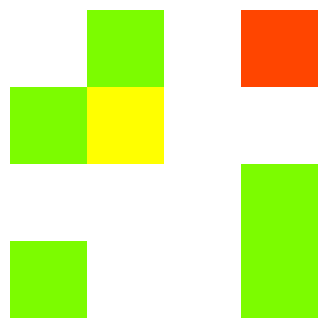

In [418]:
quality_masked_rgb = storage.read(f'quality_masked_rgb_{date}.tif')

plt.figure(figsize=(4,4))
plt.imshow(quality_masked_rgb.read())
plt.axis('off')
plt.show()

In [419]:
quality_masked_rgb.read().shape

(4, 4, 4)

In [420]:
quality_masked_rgb.read().min(), quality_masked_rgb.read().max()

(0.0, 1.0)

In [421]:
quality_masked_rgb.read()

array([[[0.        , 0.        , 0.        , 0.        ],
        [0.48627451, 0.98823529, 0.        , 1.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [1.        , 0.27058824, 0.        , 1.        ]],

       [[0.48627451, 0.98823529, 0.        , 1.        ],
        [1.        , 1.        , 0.        , 1.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.48627451, 0.98823529, 0.        , 1.        ]],

       [[0.48627451, 0.98823529, 0.        , 1.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.48627451, 0.98823529, 0.        , 1.        ]]])

In [422]:
np.unique(quality_masked_rgb.read())

array([0.        , 0.27058824, 0.48627451, 0.98823529, 1.        ])

In [423]:
len(np.unique(quality_masked_rgb.read())) 

5

In [424]:
np.unique(quality_masked_rgb.read())


array([0.        , 0.27058824, 0.48627451, 0.98823529, 1.        ])

In [425]:
np.count_nonzero(quality_masked_rgb.read()==0)

43

In [426]:
np.count_nonzero(quality_masked_rgb.read()==0.27058823529411763)

1

In [427]:
np.count_nonzero(quality_masked_rgb.read()==0.48627450980392156)

5

In [428]:
np.count_nonzero(quality_masked_rgb.read()==0.9882352941176471)

5

In [429]:
np.count_nonzero(quality_masked_rgb.read()==1)

10

# GROWTH

In [430]:
pd.read_json('data/AOI_Vegetation_Growth.json')

,Not Vegetation Ha,Vegetation Ha,Total
2019-06-02,0.11,0.05,0.16


# QUALITY

In [431]:
pd.read_json('data/AOI_Vegetation_Quality.json')

,Bare Ground,Sparse or Unhealthy Vegetation,Healthy Vegetation,Very Health Vegetation,Total
2019-06-02,0.09,0.01,0.01,0.05,0.16


In [432]:
shutil.rmtree(data_directory) 